In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

# Note of the mathematical exactness of this section

Stochastic processes can get very complicated, especially when the noise term gets nonlinear. Sometimes when people (mathematicians) write notes describing how it works, they introduce all the complexity at the start, and then derive useful results much later on. I'm going to do the opposite, I'm going to introduce only the bare bones that you need to understand a few important cases. I'm going to include a few extra things at the end.

The consequence of this is that the results that we get are only really valid for linear noise terms (sometimes called additive noise). If in the future you are trying to do something involving a stochastic processes and its giving you a different answer than here, its probably because it has a nonlinear noise term, which requires much more sophistication to handle than what we are going to do in this course. Similarly, we are only going to look at noise processes driven by Gaussian noise, since they can be worked with relatively easily. 

# 2.1 - Stochastic Processes


- Imagine that we have a certain interval of time, $t$. We can divide that interval into $n$ sections, where each section is $dt=t/n$ long. 

- each stochastic process is going to be a set of values defined at each time interval $dt$. 
  - For analytic purposes its often easiest to assume that $n\rightarrow \infty$ and treat these as continuous processes. For numerical purposes its useful to keep them as a discrete set of values.

- In this section we're going to meet the 3 most common 1D stochastic processes.

- Most of this material follow Jacobs, Kurt. Stochastic processes for physicists: understanding noisy systems. Cambridge University Press, 2010. Chapter 2-3.


## Properties of sums of independent variables 

More on sums of independent variables can be found in the extra materials at the end of this section.

If $x$ and $y$ are independent variables, i.e. $$P(x,y)=P(x)P(y),$$ then $z=x+y$ will have the following properties

1. $\left<z\right> =  \left<x\right>+\left<y\right>$
2. $\left<z'^2\right> = \left<x'^2\right> + \left<y'^2\right>$
3. If $x \sim \mathcal{N}(\mu_1,\sigma^2_1)$, and $y \sim \mathcal{N}(\mu_2,\sigma^2_2)$, then $z \sim \mathcal{N}\left(\mu_1+\mu_2,\sigma^2_1+\sigma^2_2\right)$. 
   - This only works for Gaussians, for other distributions it can be more complicated. 
   - This is easy to prove with Fourier transforms, otherwise it is a lot of annoying algebra.

## White Noise 
- The simplest stochastic process is "white noise", which is a set of independent Gaussian variables. In other words, on each interval $\delta t$ we have a random variable, $dW$. In otherwords the series is a sequence of random variables: $$dW_1,dW_2,dW_3,...,dW_n$$ 
- In order to make things scale with time, we are going to assume that each interval of white noise has a variance proportional to $dt$, in other words: $$dW_i \sim \mathcal{N}(0,dt)$$.
  - the reason for this choice will make sense after we look at the next process. 
- if instead we were to choose a set of random variables $r_i \sim \mathcal{N}(0,1)$, then we could define $dW_i = r_i \sqrt{dt}$. 
  - This is a useful for computations, because most random number generators are configured to generate $\mathcal{N}(0,1)$ and not $\mathcal{N}(0,dt)$.
- by definition $\left<dW_i\right>=0$
- Since the $dW_i$ are independent, then $$\left<dW_i dW_j\right> = \delta_{ij} dt$$ where $\delta_{ij}$ is 1 if i=j, and 0 otherwise.
- In the example below there is a plot of white noise. It looks like what you expect. 

## Red Noise or "a Gaussian random walk" 
,
- Imagine that we have a particle with position W(t), initially at x=0. Every $\delta t$ the particle either "steps" $dW_i$ up or down. 
  - If this seems confusing, skip to the example and see what this looks like.
- What is $W(t)$? Well if the $dW_i$ were just numbers, then $W(t)$ would be a sum. However since the $dW_i$ are random variables, then $W(t)$ is also a random variable. 
  - In otherwords, evertime we want to simulate $W(t)$ we have to create a new set of $dW_i$, and since the $dW_i$ are random every time $x(t)$ will also be random. 
- From the properties of the random variables discussed before, we know that each step is just summing another Gaussian variable, so the final distrubtion should be Gaussian. It also follows that $$ W(t) \sim \mathcal{N}\left(\sum_{i=0}^{i=n}0,\sum_{i=0}^{i=n}dt\right)=\mathcal{N}\left(0,t\right)$$
  - This is a really important result. Even though the mean of $W$ is 0, the variance is increasing with time. One way to intepret this result is that the average size of an excursion away from 0 are growing, so the variance increases, but since the excursions can be either positive or negative the mean remains 0. Again, if you're curious what this looks like skip to the example below.
- If we make $dt\rightarrow 0$, then we will transition from a sum to an integral, e.g. $$ W(t)-W(0) = \int_{0}^t dW$$ In other words, $W$ is a process composed of infinitely many, infinitely quick, random pulses of magnitude dt. 
  - Most of the time we will assume that $W(0)=0$ and ignore it. If $W_0 \neq 0$ its equivalent to changing the mean of the process by $W_0$.
 
## Why did we choose $dW_i = r_i \sqrt{dt}$?
- the fact that $dW$ scales as $\sqrt{dt}$ is the essence of $W$. if you have a simulation where $dt \neq 1$ and you don't scale $dW$ as $\sqrt{dt}$ you will not get the correct answer. Its also very important for understanding the analytic solutions. 

- Suppose that instead we had chosen $dW^\alpha_i = r_i \sqrt{dt}^\alpha$, and following the steps as before, and using $dt=t/n$, we would get a new process $W^\alpha$ for which $$ W^\alpha(t) \sim \mathcal{N}\left(\sum_{i=0}^{i=n}0,\sum_{i=0}^{i=n}dt^\alpha\right)=\mathcal{N}\left(0,n \left(tn^{-1}\right)^\alpha\right)$$

- Now suppose that we want to make it continuous again, which amounts to taking $n\rightarrow \infty$. If we have $\alpha=1$, then the $n$'s drop out of the expression for the variance. For any other value of $\alpha$, the $n$'s won't drop out, and the variance will either be infinitely large or infinitely small, even for a fintite time. These are not really interesting processes to study, so the only choice is to make scale $dW_i$ with $\sqrt{dt}$.

- Although this scaling is the only choice that we could make, it still has weird consequences. Most notably that the process is continous but not differentiable because:

    - Continuity: $\lim_{dt\rightarrow 0} W(t+dt)-W(t) \sim \lim_{dt\rightarrow 0} \sqrt{dt} \rightarrow 0$

    - Differentiability: $\lim_{dt\rightarrow 0} \frac{W(t+dt)-W(t)}{dt} \sim \lim_{dt\rightarrow 0} \frac{1}{\sqrt{dt}} \rightarrow \infty$.

- So $W(T)$ is a very weird mathematical object. We're not going to need to know that much about how weird it is, because we can work around it by only ever considering integrals and  differentials and not derivatives. In other words, things like $x=\int \gamma dW$ or $dx = \gamma dW$ make sense, but $\frac{dW}{dt}$ does not. 


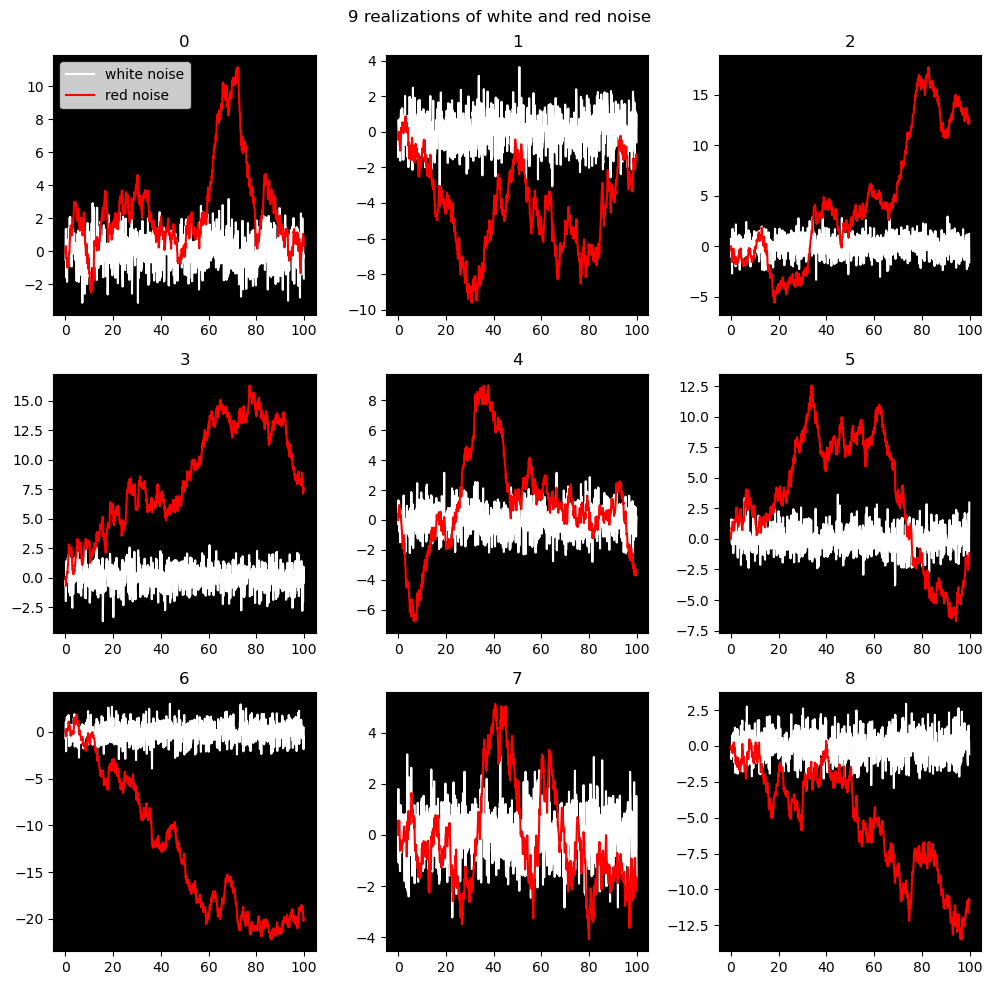

In [4]:
# how many realizations we're going to make
M=9

# the length of each realization
N=1000

# createa a vector of white noise realizations
# e.g. dW[0,:] is a vector of white noise
dW = np.random.randn(M,N)

# container to put the data
W = np.zeros([M,N])

dt = 0.1 
t=np.arange(0,N*dt,dt)

# lets make a little loop and integrate over this 
# note that the loop only runs over the last N-1 points
# this is the same as using 0 as the intial condition
# the way that I've written the loop here integrates all the realizations at once
for i in range(1,N):
    W[:,i] = W[:,i-1] + np.sqrt(dt) * dW[:,i]

# we're going to make the red noise red in color.
colors=np.array(plt.cm.Reds(np.linspace(0.5,0.75,M)))

# I did it this way just to show how to use subplots effectively
fig,axs = plt.subplots(3,3,figsize=(10,10))
for i in range(0,M):
    i0 = i//3
    i1 = i%3
    axs[i0,i1].plot(t,dW[i,:],label='white noise',color='w')
    axs[i0,i1].plot(t,W[i,:],label='red noise',color='r')
    axs[i0,i1].set_facecolor('black')
    if i==0: 
        axs[0,0].legend()
    axs[i0,i1].set_title(i)
fig.suptitle('9 realizations of white and red noise')
fig.tight_layout()

## the 1D Orstein Uhlenbek (OU) processes or "Red Noise with a negative feedback"

- Suppose that we want to have a new process, e.g. $x(t)$, which doesn't go to $\infty$ if we let $t$ get big. We need to do something to lower the variance of $x$ in such a way that it compensates for the increases in variances from $W$. 
- To do this we're going to think about $x$ as the solution to a stochastic differential equation: $$dx = f(x)dt + \gamma dW$$ where $f(x)$ is a deterministic function, $\gamma$ is a constant known as the noise strength, and $dW$ is white noise. 
- $\gamma$ has somewhat unusual units. Since the units of $dW$ are the square root of the units of time, the units of $\gamma$ are the units of x divided by the square root of the units of time.
- An obvious choice is $f(x) = -\frac{x}{\tau}$, for reasons explained below. This is called the 1D OU process (amongst other names). 

### Solutions to the 1D OU process
 
- If we chooise $\gamma=0$ the 1D OU process is just an exponential decay process. Lets find $x(t)$ after giving $x(t_0)=x_0$ as an initial condition:
$$
\begin{align*}
    dx &=& -\frac{x}{\tau} dt \\
    d \left(x \exp\left(\frac{t}{\tau}\right) \right) &=& 0 \\
    x \exp\left(\frac{t}{\tau}\right)  &=& x_0 \exp\left(\frac{t_0}{\tau}\right) \\
    x &=& x_0 \exp\left(\frac{t_0-t}{\tau}\right)  \\
\end{align*}
$$ 
  - The function $\exp\left(\frac{t}{\tau}\right)$ is known as an integrating factor. By multiplying both sides by the integrating factor we can go from 2 terms into a single term using the product rule, which can then be integrated. 

- we can follow exactly the same steps for the stochastic version:

$$
\begin{align*}
    dx &=& -\frac{x}{\tau}dt + \gamma dW \\
    d \left(x \exp\left(\frac{t}{\tau}\right) \right) &=& \exp\left(\frac{t}{\tau}\right) \gamma dW \\
    x \exp\left(\frac{t}{\tau}\right)  &=& x_0 \exp\left(\frac{t_0}{\tau}\right) + \int^{t}_{t_0} \exp\left(\frac{t'}{\tau}\right) \gamma dW(t')  \\
    x &=& x_0 \exp\left(\frac{t_0-t}{\tau}\right) + \int^{t}_{t_0} \exp\left(\frac{t'-t}{\tau}\right)\gamma dW(t')  \\
\end{align*}
$$

- What is the solution? It has two parts, the first is a deterministic part that just decays away. The second part is a stochastically fluctuating part. Each "time step" a randomly chosen variable is added as a forcing. The effect of that random forcing on the solution decays exponentially quickly away from the time when the random fluctuation happens.
  
### Moments of the solution
- The full proof of the mean and the variance will be in the extra notes at the end, here I will just sketch the idea. 
- For the mean, we would take $\left<x\right>$. For the first term, this won't do anything because there are no random variables. In the second term, we would get something proportional to $\left<dW\right>=0$, and so it will vanish, and we get $$\left<x\right> = x_0 \exp\left(\frac{t_0-t}{\tau}\right) $$
  - in otherwords, the mean that we expect is just decaying towards 0.
- For the variance, we can calculate $\left<\left(x-\left<x\right>\right)^2\right>$, which will be $$ \left<\left(x-\left<x\right>\right)^2\right> = \left<\left(\int^{t}_{t_0} \exp\left(\frac{t'-t}{\tau}\right)\gamma dW(t')\right)^2\right> $$ 
  - This looks intimidating, but the only random variable is $dW(t')$, and since $\left<dW^2\right>=dt$ the expression can be switched to an integral in time: $$\left<\left(x-\left<x\right>\right)^2\right> = \int^{t}_{t_0} \left(\exp\left(\frac{t'-t}{\tau}\right)\gamma\right)^2 dt' $$ 
  - Evaluating the integral gives $$ \left<\left(x-\left<x\right>\right)^2\right> = \gamma^2 \frac{\tau}{2} \left(1 -  \exp\left(2\frac{t_0-t}{\tau}\right) \right) $$
- The key thing to notice here is that the first term doesn't involve any random variables, and so it determines the mean of the process, but not the variance. The second term involves a random variable, so it determines the variance but not the mean.
  - This is a good example of predictability - the first term is predictable, while the second one is not. How predictable the overall system is will depend on the ratio of these two terms. 
- In the limit that $t\rightarrow \infty$ we will get $$\left<x\right>=0$$ and $$\left<\left(x-\left<x\right>\right)^2\right>=\gamma^2 \frac{\tau}{2}$$
  - its good that these are both finite, that was the entire point of choosing this process to study!

## Summary Table 

|Name | Definining Equation | Mean | Variance |
| --- | --- | --- | --- |
| White Noise | $dW(t)$ | 0 | $\delta(t-t')dt$ |
| Red Noise | $W(t)-W(0) = \int^{t}_{0} dW$ | $W_0$ | t |
| 1D OU | $dx = -\frac{x}{\tau} dt + \gamma dW$ | $x_0 \exp\left(\frac{t_0-t}{\tau}\right) $ | $\gamma^2 \frac{\tau}{2} \left(1 -  \exp\left(2\frac{t_0-t}{\tau}\right) \right)$ |

## Some terminology 
- Stationarity: a process where the moments do not change in time is called a stationary process. Although red noise has a finite variance, it is not stationary, while the 1D OU is stationary. The mean and variance in the limit that $t\rightarrow \infty$ are called the stationary mean and the stationary variance.


- Ergodicity: we won't use this one much, but a process where the ensemble mean is the same as the time mean is an ergodic process. 
- Other names for $W$: this is one of the most studied process of all time. Mathematicians call it the Weiner process, which is why its denoted as $W$. Physicists call it Brownian motion, after a guy who noticed that pollen grains in water move around stochastically. There are probably other names that I don't know, it's basically everywhere. 


- Other names for the 1D OU process: This is also a very studied equation, sometimes it is called the Langevin equation in physics. 
  - A special case arises if we set $dt=1$ and set $\varphi=1-dt\tau^{-1}$, in which case the discrete form of the stochastic differential equation we started with could be written as $$x_{i+1}=\varphi \,x_{i} + \gamma \,r_i$$ In the statistics literature, this is known as a first order autoregressive model, or an AR1 process. Although this form looks simpler, when time is involved it can become complicated to interpret, at which point its usually easier to convert it back into a stochastic differential equation and interpret it that way.
  


## Numerically simulating the 1D OU process

- there are 2 ways that this can be done.
-  The first is to use the differential equation form that we started with: $$dx_i = -\frac{x_i}{\tau}dt+\gamma \sqrt{dt}\,r_i $$ and then each time step can be advanced with $x_{i+1}=x_{i}+dx_{i}$
   - for non stochastic equation, this is called Euler's method. For stochastic equations, this is called the Euler-Maruyama method.
   - the limitation of this method is that the time step needs to be small, usually $dt/\tau<100$ works.
- The second is to discretize the full integral solution. For simplicity set $x_0=0$, then we will have $$\begin{align*}x_n &=& \int^{t}_0 \exp\left(\frac{t'-t}{\tau}\right) \gamma dW \\ x_n & \approx & \sum_{i=0}^{i=n} \gamma e^{\frac{t_i}{\tau}}e^{-\frac{t_n}{\tau}} \gamma\sqrt{dt}\,r_i \\ x_n &=& \left(\sum_{i=0}^{i=n-1} \gamma e^{\frac{t_i}{\tau}}e^{-\frac{t_{n-1}}{\tau}} \gamma\sqrt{dt}\,r_i\right)e^{-\frac{t_n-t_{n-1}}{\tau}} + e^{\frac{t_n}{\tau}}e^{-\frac{t_n}{\tau}} \gamma\sqrt{dt}\,r_n \\ x_n &=& x_{n-1} e^\frac{-dt}{\tau} +  \gamma\sqrt{dt}\,r_n
\end{align*}$$
   - Note that if we taylor expand this answer we will get back the Euler method.
   - in principle this method should be numerically stable for any $dt$, however the answers will not be very good unless $dt$ is small. 
 - In general numerically solving stochastic equations is much more complicated than solving normal differential equations, and usually the order of convergence is much worse. This is way beyond the scope of this course, so we will stick to simple methods like the ones here. 



# 2.2 - Autocovariance and autocorrelation

- DelSole, Timothy, and Michael Tippett. Statistical methods for climate scientists. Cambridge University Press, 2022. Chapter 5
- Percival, Donald B. "Three curious properties of the sample variance and autocovariance for stationary processes with unknown mean." American Statistician (1993): 274-276.

## Definition

- Previously we saw the covariance between two variables: $\left<x'y'\right>$. 
  
- If we calculate the covariance of a process with itself but at a later time we get the autocovariance, i.e. $$C(t,l)=\left<x'(t)x'(t+l)\right>$$ 
  - the data $x(t+l)$ is said to be "lagged" $l$ time behind $x(t)$. This is also why $C$ is sometimes called the lagged covariance.
  
- If the data is stationary, then the covariance will not depend on time, and so stationary autocovariance is $C(l)$.
  - as a special case note that $C(0)=\left<x'^2 \right>$ i.e. the variance.
  
- the stationary autocovariance can be defined using an integral as $$ C(l) = \int x'(t)x'(t+l) dt $$
  - We can think about this integral as choosing a single lag, and then finding the product of all the points that are lagged by that amount, and then integrating over them.
  
- for a stationary process, it doesn't matter whether we pick $x'(t)x'(t+l)$ or $x'(t-l)x'(t)$. As a consequence, $C(l)=C(-l)$, and we can also write $$C(l)=\int x'(t-l)x'(t) dt$$
  - In this form it makes it clear that $C$ is a special case of a broader class of integral transforms called convolutions: $$ (f*g)(y) \equiv \int f(y)g(y-x)dx $$ As a result $C$ is sometimes called a convolution in time space. 
  
- The autocorrelation is the same idea as the autocovariance, but now we normalize it by the variance, in otherwords: $$R(l)=\frac{C(l)}{C(0)}$$
  - as you might expect $|R(l)|\leq 1$

- Note, some books, such as the Random Data book in the course references, refer to $\left<x(t)x(t+l)\right>$ as the autocovariance, and $\left<x'(t)x'(t+l)\right>$ as the autocorrelation. I find this to be really confusing, but if you read that book or another and find that $|R(l)|>1$, it may be a difference in definition.


## 2.2 - Stationary Autocovariance of the 1D OU process 

- We know that for the 1D OU process the only term that matters for the variance is the second random term involving $dW$. Similarly this is the only term that matters for the covariance, and we can write the whole expression: 
$$
C(t_0,l) = \left<\left(\int^{t+l}_{t_0} \exp\left(\frac{t'-(t+l)}{\tau}\right)\gamma dW(t')\right)\left(\int^{t}_{t_0} \exp\left(\frac{t''-t}{\tau}\right)\gamma dW(t'')\right)\right>
$$

- Again, this looks intimidating, but if we notice 2 things it becomes really simple:
  1. we can take out a factor of $\exp\left(\frac{-l}{\tau}\right)$ outside of the integral and make the exponential factors the same because the integral does not depend on $l$.
  2. for the part of the integral $t'\in\left(t_0,t\right)$ we will have $\left<dW(t')dW(t'')\right>=\delta(t'-t'')dt$. However when $t'\in\left(t,t+l\right)$ we have $\left<dW(t')dW(t'')\right>=0$, because the $dW$ are independent, and so its only the $dW$ at the same time that have non zero variance. 

- So if we factor out a $\exp\left(\frac{-l}{\tau}\right)$ and ignore the part of the integral in $t'\in\left(t,t+l\right)$, then the entire expression reduces to the same as the expression for the variance multiplied by a new exponential factor, so:  $$ C(l) = \exp\left(-\frac{l}{\tau}\right) \frac{\gamma^2\tau}{2}$$

- This is basically why the 1D OU process is studied. By choosing $\gamma$ and $\tau$ we can tune the variance and the autocovariance of the process. This is important for two reasons: 
  1. If the only information we have about a time series is the variance and autocovariance then the 1D OU process is a good model.
  2. If we want to generate data has a given variance and autocovariance to test a different statistical too or to compare real data to then the 1D OU process is a good choice. 

## Estimating the Autocovariance from data

- This is a suprisingly complicated topic. For a discussion about the bias in detail, see: Percival, Donald B. "Three curious properties of the sample variance and autocovariance for stationary processes with unknown mean." American Statistician (1993): 274-276.

- If we have a data set $x_i$ that has $n$ data point, where the mean of a process is known to be $\mu$ (**not** estimated), then the autocovariance can be estimated as $$C(t,l) = \frac{1}{n-l} \sum_{i=l}^{i=n} \left(x_{i-l}-\mu\right)\left(x_{i}-\mu\right)$$ where $x_1=x(t)$. It can be proved that this is an unbiased estimator. 

- for the case where the mean is not known, in which case we replace the known mean with the estimate $\overline{x}=\frac{1}{n} \sum_{i=1}^{i=n} x$, then the estimate will always be biased, in otherwords the expectation value of the thing we calculate will be different from the true value. However the Statistics for Climate Science by Delsole and Tippet book suggests choosing $$C(t,l) = \frac{1}{l} \sum_{i=1}^{i=n-l} \left(x_{i}-\overline{x}\right)\left(x_{i+l}-\overline{x}\right)$$ in order to have some desirable properties with the power spectrum that we will see later.

- The estimate of the autocorrelation will be the same, its just the estimate of the autocovariance divided by the variance. 
  
- An interesting propoerty of estimates of the autocovariance and autocorrelation is that the estimates get worse the longer of a lag that we use. Intuitively this makes sense, For a lag of 0 we can use the entire time series to estimate the covariance, for a lag of 1 we can only use n-1 points to estimate the time series, and for a lag of 1000 we can only use the n-1000 points to estimate the covariance. This becomes a problem as $l$ starts to grow.  
  - To consider this more quantitiatively, lets look at the autocorrelation. Remember from section 1 that the correlation has a t-value according to $$t_0 = \frac{R(0) \sqrt{n-2}}{\sqrt{1-R(0)^2}} $$ For the autocorrelation we have to replace $n$ with $n-l$ to get $$t_l = \frac{R(l) \sqrt{n-l-2}}{\sqrt{1-R(l)}} $$
  - So for large $l$ the correlation needs to be larger in order to get as large a t-value. In practice most processes tend to have $R(l\rightarrow \infty)0$, which exacerbates the effect of having a small sample. 
  
## Effects of autocorrelation on estimating parameters

- Before we saw that the standard error of the mean was $$\frac{\left<x'^2\right>}{\sqrt{n}}$$
  
- This works when all the data, $x_i$, is completeley independent, what would happen if they were taken from a time series where the data could be autocorrelated? For simplicity lets assume that the data is stationary, so that $C(t,l)=C(l)$. The variance of the mean (standard error of the mean squared) is $$ \frac{1}{n^2}\sum_{i,j}\left<X_i'X_j'\right> $$ Using the definition of autocorrelation, and setting $l=i-j$ this can be rewritten $$ \frac{\left<X'^2\right>}{n^2}\sum_{i,j}R(i-j) $$ 

- Lets think about 2 cases:
  - If data is completely uncorrelated, then $R(i-j)=\delta_{ij}$, so that $\sum_{i,j}R(i-j)=n$. In this case we get back the normal standard error of the mean. 
  - If the data is from a 1D OU process, then $$R(i-j)=\exp\left(\left(i-j\right)\frac{dt}{\tau}\right)$$ For $i=j$, $R(i-j)=1$, and for $i\neq j$, $R(i-j)\geq1$, so we will have $\sum_{i,j}R(i-j)>n$. 
   
- So compared to an independent process, the standard error of the mean will be higher. In other words, autocorrelation removes some degrees of freedom from the data. This can be also be seen by writing the new standard error of the mean: $$ \frac{\left<x'^2\right>}{\sqrt{n_{eff}}}$$ where $n_{eff}$ is the "effective number of degrees of freedom" $$n_{eff}=n^2\left(\sum_{i,j}R(i-j)\right)^{-1}$$   

# 2.3 Mutlivariate OU processes

- Jacobs, Kurt. Stochastic processes for physicists: understanding noisy systems. Cambridge University Press, 2010. Chapter 2-3.
- The multivariate theorems can all be found here: Gardiner, Crispin W. Handbook of stochastic methods. Vol. 3. Berlin: springer, 1985. Chapter 4.
- The stochastic oscillator example can be viewed as a special case of the AR2 processes that are discussed in DelSole, Timothy, and Michael Tippett. Statistical methods for climate scientists. Cambridge University Press, 2022. Chapter 5


## Solving a multivariate linear ODE
- Suppose that we have the equation $$d\vec{x} = A \vec{x} dt $$ where $A$ is matrix containing the coefficients of the derivatives.
  
- We would like to solve this the same way as the 1D equation, i.e. $$ \vec{x} = \vec{x_0} \exp\left( A\left(t_0-t\right)\right) $$ but now $A$ is a matrix, so we need to define the exponential of a matrix. 
  
- The easiest way to define this is with a taylor series: $$ \exp\left( A \right) = \sum_n \frac{A^n}{n!} $$ but now we have to figure out how to compute what $A^n$ is.
  
- For a given matrix $A$, if we denote the eigenvalues and eigenvectors as $\lambda_i$ and $\vec{p}_i$, Then these are defined by $$A \vec{p}_i= \lambda_i \vec{p}_i$$ If we put the eigenvalues and eigenvectors into matrices, $\Lambda = \mathrm{diag}(\lambda_1,...,\lambda_N)$, $P=\left[\vec{p}_1,...,\vec{p}_n\right]$, then 
   $$ A = P^{-1} \Lambda P$$ 
   This is a very useful form because 
   $$A^n = P^{-1} \Lambda^n P$$ 
   So plugging this into our expression for the matrix exponential we get the result: 
  $$ \exp\left( At \right) = P^{-1} \exp\left(\Lambda t \right) P$$
  where we can show that 
 $$\exp\left(\Lambda t \right) = \mathrm{diag}(e^{\lambda_1 t},...,e^{\lambda_N t})$$

- One way to interpret the solution is that to imagine it as a set of transformations acting on $x_0$:
  - $Px_0$ projects $x_0$ onto the set of eigenvectors
  - $\exp\left(At\right)\left(Px_0\right)$ rotates and expands or contracts each eigenvector by an amount that increases as $t$ increases
  - $P^{-1}\left(\exp\left(At\right)Px_0\right)$ projects the eigenvectors back onto the normal coordinate space.

## Solving a multivariate linear stochastic ODE

- Suppose now that we have a NxN multivariate linear stochastic ODE $$d\vec{x} = A \vec{x} dt + Bd\vec{W} $$ where $B$ is a noise strength matrix (usually diagonal), and $d\vec{W}$ is a vector of independent normal Gaussian variables. The solution to this looks basically the same as the 1D case: $$ \vec{x} = \exp\left( A \left(t_0-t\right) \right) \vec{x}_0 +  \int^{t}_{t_0} \exp\left( A \left(t'-t\right) \right) Bd\vec{W}  $$ note here that the order of operations matters, because we are using matrices.
- The mean is also very similar to the 1D case: $$ \left<\vec{x}(t)\right> = \exp\left( A \left(t-t_0\right) \right) \vec{x}_0  $$
- In order to have stationary solutions we must have $\mathcal{R}\left(\lambda\right)<0$ for all of the eigenvalues. If this is the case, then $A$ is dissipating the noise that is being added by the stochastic term. 
- The analog to the 1D stationary variance relation is a very famous theorem called the fluctuation dissipation theorem: $$ AC+CA^T = BB^T $$ where $C$ is the stationary covariance matrix, i.e. $$ C_{ij} = \left<x_i'x_j'\right> $$
  - The key idea here is there is a relationship, similar to the one we saw in the 1D case, that relates how strong the fluctuations of the system are $C$, to the strength of the noise forcing $B$ and the strength of the dissipation $A$.
  - Versions of this theorem appear everywhere in statistics and statistical mechanics. Its been used to do everything from quantifying eddy feedbacks in the atmosphere and ocean to estimating the response of the atmospheric circulation to climate change based on modern day variability.   
- The stationary autocorrelation matrix is also analagous to the 1D case: $$ \left<x'(\tau+t){x^T}'(t)\right> = \exp\left( -A\tau \right) C  $$

## The stochastic oscillator 

### but first, a non-stochastic damped oscillator 
- Consider the equation matrix equation:
$$ d\vec{x} = A \vec{x} dt $$  

where 

$$ A = \begin{pmatrix} -\tau^{-1} & 2\pi f  \\ -2\pi f & -\tau^{-1}  \end{pmatrix} $$

- The solution can be written $$\vec{x} =  \exp\left( A (t_0-t)\right) \vec{x}_0$$

where 

$$ \exp\left( A (t_0-t)\right) = \exp\left(\frac{t_0-t}{\tau}\right) \begin{pmatrix} \cos\left(2\pi f(t_0-t)\right) & -\sin\left(2\pi f( t_0-t)\right) \\ \sin\left(2\pi f(t_0-t)\right) & \cos\left(2\pi f(t_0-t)\right) \end{pmatrix} $$

- To understand why these solutions look oscillatory note that the eigenvalues of $A$ are $-\frac{1}{\tau} + i 2\pi f$ and $-\frac{1}{\tau} - i 2\pi f$. The matrix exponential is then $$  \exp\left( A (t_0-t)\right) = P^{-1} \begin{pmatrix} \exp\left(-\frac{t}{\tau}\right)  \exp\left(i 2\pi f \right) & 0 \\ 0 &  \exp\left(-\frac{t}{\tau}\right)  \exp\left(- i 2\pi f \right)\end{pmatrix} P $$
  - so the matrix exponential is combining two oscillatory modes. In general this will happen whenever we have a matrix with negative complex eigenvalues.

- For the purposes of doing numerical simulations, its convenient to set $t_0-t = dt$, so then $$\vec{x}(t+dt) =  \exp\left( Adt\right) \vec{x}(t)$$

E: [[ 0.99750954  0.031348  ]
 [-0.031348    0.99750954]]


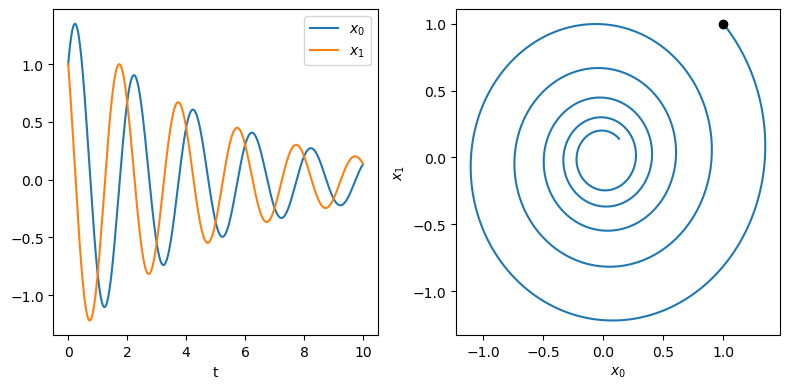

In [3]:
# Make some exampled damped oscillations using the matrix exponential 

# going to set dt=0.1 so that the curve is relatively smooth
dt = 0.01

# set some constants, you can vary these to test out different choices. 
tau = 5
f = 1/2

# define the matrix propogator
A = np.array([[-1/tau,2*np.pi*f],[-2*np.pi*f,-1/tau]])
E = la.expm(A*dt)

# lets see what E looks like 
# you can see all the values are less than 1 
# thats because the real part of the eigenvalue is negative, 
# so the solutions are damped
print('E:', E)

# some intial conditions
x0=np.array([1,1])

# how many steps to take
# I'm going to enforce that we take at least 2 e-foldings of timesteps
M=int(2*tau/dt)
t=np.arange(0,M*dt,dt)

#container for the data
x=np.zeros([M,2])
x[0,:]=x0
# main time loop
for i in range(1,M):
    x[i]=np.dot(E,x[i-1,:])

# make some quick plots
fig,axs=plt.subplots(1,2,figsize=(8,4),dpi=100)

axs[0].plot(t,x[:,0],label='$x_0$')
axs[0].plot(t,x[:,1],label='$x_1$')
axs[0].set_xlabel('t')
axs[0].legend()

axs[1].plot(x[:,0],x[:,1])
axs[1].plot(x0[0],x0[1],'ko')
axs[1].set_xlabel('$x_0$')
axs[1].set_ylabel('$x_1$')

fig.tight_layout()

### now its time for the stochastic oscillator

- proceeding the same as always, the solution to the stochastic oscillator is $$ \vec{x} = \exp\left( A \left(t_0-t\right) \right) \vec{x}_0 +  \int^{t}_{t_0} \exp\left( A \left(t'-t\right) \right) Bd\vec{W} $$ where $\exp\left(A \left(t_0-t\right)\right)$ is the same as for the nonstochastic case.

- Also similarly the mean is $$ \left<x\right> = \exp\left( A \left(t_0-t\right) \right) \vec{x}_0 $$ e.g. what we just calculated as the nonstochastic damped oscillator.
  
- and similarly to the 1D case the variance will be

$$\left< \left(\vec{x}-\left<\vec{x}\right>\right)\left(\vec{x}-\left<\vec{x}\right>\right)^T \right> = \int^{t}_{t_0} \exp\left( A \left(t'-t\right) \right) BB^T \left(\exp\left( A \left(t'-t\right) \right) \right)^T  dt $$

- To go further we need to choose the structure of the noise that we are using by defining $B$. If we assume that the noise forcing is the same for both components, we will have  $$ B = \begin{pmatrix} \gamma & 0 \\ 0 & \gamma \end{pmatrix}$$, in which case we can use the expression $$\exp\left(At\right)\exp\left(At\right)^T=\exp\left(-2\frac{t}{\tau}\right) I $$ and doing integral to get $$\left< \left(\vec{x}-\left<\vec{x}\right>\right)\left(\vec{x}-\left<\vec{x}\right>\right)^T \right> = \gamma^2 \frac{2}{\tau} \left( 1- \exp\left(-2\frac{t}{\tau}\right)\right) I$$

- In other words, the variance of each component of the stochastic oscillator will be the same as for an equivalent 1D OU process, and the covariances will be 0. This will not be the case with more complicated forms of $B$. 

## Cross Autocovariance 

- we had the covariance which was $\left<x(t)'y(t)'\right>$, and the autocovariance which was $\left<x(t+l)'x(t)'\right>$, what would happen if we combined the two? You would get the cross autocovariance $$\left<x(t+l)'y(t)'\right>$$
- all of the stuff that we talked about for the autocovariance is also true for the cross covariance. 
- As with the covariance matrix, we will frequently store these in matrices, i.e. $$C(l)=\begin{pmatrix} \left<x(t+l)'x(t)'\right> & \left<x(t+l)'y(t)'\right>\\ \left<x(t+l)'y(t)'\right> & \left<y(t+l)'y(t)'\right> \\ \end{pmatrix}$$
    - more generally if we write our variables as a vector, then $C(l)=\left<\vec{x}(t+l)x^T(t)\right>$
- For a multivariate OU process the stationary autocovariance, analagously to the 1D case is $$ C(l)= \exp\left(A\,l\right)\left<\vec{x}(t)\vec{x}^T(t)\right>  $$
- As a special case of this, if we have a stochastic oscillator with $$B=\begin{pmatrix} \gamma & 0 \\ 0 & \gamma \\ \end{pmatrix}$$ then the stationary  aucovariance is $$C(l) = \frac{\gamma^2}{2\tau} \exp\left(-\frac{l}{\tau}\right) \begin{pmatrix} cos\left(2\pi \frac{l}{f}\right)& -sin\left(2\pi \frac{l}{f}\right) \\ sin\left(2\pi \frac{l}{f}\right) &  cos\left(2\pi \frac{l}{f}\right) \\ \end{pmatrix} $$

- In the same way that having a process with a stationary autocovariance was the point of studying the 1D OU process, having a non trivial stationary cross autocovariance was the point of studying the stochastic oscillator.  


# 2.X - extra material

This section for some things that I wrote that are interesting but aren't really necessary for understanding or doing the labs.

## Sums of independent random variables

Lets start with a little example. Suppose that we have two six sided dice, and we want to figure out what the probability of distribution is. For example, the probability of getting a sum of 4 is:

$P(4) = P(3)P(1)+P(2)P(2)+P(1)P(3) = \sum^{i=3}_{i=1} P(4-i)P(i)$

This last line implies how to generalize it. Instead of trying to list all the possibilities of variables that can produce a result, its easier to vary one variable over the entire range that we are interested in ($i$ in the example above), and then specify the other variable as the answer we want to get minus the variable that we are varying ($4-i$ in the example above). For the dice example we can write:

$P(x) = \sum_{i=1}^{i=6} P(x-i)P(i)$

We can extend this logic to continuous variables. Suppose that $x$ and $y$ are independent variables. Then the probability distribution for their sum $z=x+y$ is 

$P(z) = \int P_x(z-s)P_y(s) ds = \int P_x(s)P_y(z-s) ds = P_x*P_y $

in other words, it's a convolution.


## Explicit Moment Calculations of the OU process:

Its nice to write the solution as 

$x = x_d +x_r$

where $x_d$ is the deterministic first term, and $x_r$ is the random second term. It turns out that this is a generic property of the linear stochastic processes with additive noise.

Its relatively easy to figure out the mean:

$$
\begin{align*}
\left<x\right> &=& \left<x_0 \exp\left(\frac{t_0-t}{\tau}\right) \right> + \left<\int^{t}_{t_0} \exp\left(\frac{t'-t}{\tau}\right)\gamma dW(t')\right> \\
&=& x_0 \exp\left(\frac{t_0-t}{\tau}\right)+ \int^{t}_{t_0} \exp\left(\frac{t'-t}{\tau}\right)\gamma \left< dW(t')\right> \\
&=& x_0 \exp\left(\frac{t_0-t}{\tau}\right)
\end{align*}
$$

So not too suprisingly the mean of $x$ is given by $x_d$. 

For the variance $$\left<\left(x-\left<x\right>\right)^2\right>=\left<\left(x-x_d\right)^2\right>=\left<x_r^2\right>$$

Which we can now calculate:

$$
\begin{align*}
    \left<x_r^2\right> &=& \left< \int^{t}_{t_0} \exp\left(\frac{t'-t}{\tau}\right)\gamma dW(t')\int^{t}_{t_0} \exp\left(\frac{t''-t}{\tau}\right)\gamma dW(t'') \right> \\
    &=& \gamma^2\int^{t}_{t_0} \int^{t}_{t_0}  \exp\left(\frac{t'-t}{\tau}\right) \exp\left(\frac{t''-t}{\tau}\right) \left<  dW(t'')dW(t') \right> \\
    &=& \gamma^2\int^{t}_{t_0} \int^{t}_{t_0}  \exp\left(\frac{t'-t}{\tau}\right) \exp\left(\frac{t''-t}{\tau}\right) \delta(t'-t'') dt \\
    &=& \gamma^2\int^{t}_{t_0} \exp\left(2\frac{t'-t}{\tau}\right) dt \\
    &=& \gamma^2 \frac{\tau}{2} \left(1 -  \exp\left(2\frac{t_0-t}{\tau}\right) \right) \\
\end{align*}
$$

## Conditional probabilities of 1D processes:
- All of the 1D processes that we studied have Gaussian distributions. An interesting question is how can we write the solutions as explicitly Gaussian distributions? For this, we need to work out the conditional probabilities using the 
  
- For white noise the increments are indepdendent, so $$P(dW|dW_0)=P(dW)=\mathcal{N}\left(0,dt\right)$$
  
- for red noise by definition we have $$P(W,t|W_0,0)=\mathcal{N}\left(W_0,t\right)$$
 
- For the 1D OU process we computed the mean and variance explicitly, so plugging them back in we get $$ P(x,t|x_0,t_0) = \mathcal{N}\left( x_0 \exp\left(\frac{t_0-t}{\tau}\right), \gamma^2 \frac{\tau}{2} \left(1 -  \exp\left(2\frac{t_0-t}{\tau}\right) \right) \right) $$

- For the stationary solution this becomes $$ P(x,t) = \mathcal{N}\left(0, \gamma^2 \frac{\tau}{2} \right) $$

- These expressions can be useful if you want to generate a distribution of variables at a certain time without having to generate an entire series first. Its never come up for me, but you might find a use for it. 

## PDF evolution equations

- for red noise the probability distribution function also satisfies the evolution equation: $$ \partial_t P = \partial^2_{x} P $$

- The evolution equation for the probabilty distribution equation for the 1D OU is $$ \partial_t P = \frac{1}{\tau} \partial_x{\left(xP\right)} +  \frac{\gamma^2}{2} \partial^2_{x}{P} $$

- The difference in evolution equations is another way to explain why the OU process can be stationary but red noise cannot be. For red noise the PDF will diffuse away no matter what, while for the 1D OUP the diffusion is balanced by a restoring term.

- This actually generalizes a lot, so that if you have a stochastic diffential equation $$dx = a(x,t)dt + b(x,t)dW$$ its pdf will satisfy the evolution euqation: $$ \partial_t{P} = -\partial_{x}\left(aP\right) + \partial^2_x \left(\frac{1}{2}b^2 P\right) $$
  - note that unlike all the other equations studied here the noise in this case can be multiplicative, e.g. b can a function of x.
 
- The pdf evolution equations are also called the Fokker-Plank equations. In theory you could use their multivariate forms to integrate any weather or climate forecast into the future and solve the entire probability distribution. In practice this isn't feasible, so instead people have developed techniques based on stochastic differential equations to estimate at least the first few moments of the distribution. For a linear process this is known as Kalman filtering, and we will study it in section 5. 

## Comparison of the AR2 process and the stochastic oscillator

- An AR2 process can be written $x_{i+1}=\varphi_i x_{i} + \varphi_{i-1}x_{i-1} + \beta r_i$

- I picked the particular form of the AR2 process that I used because I tried plugging a few different things into wolfram alpha and quickly realized that this was the only that was simple analytically. More commonly, stochastic oscillators can be written as $$ \frac{d}{dt}\begin{pmatrix} x \\ y \end{pmatrix} = \begin{pmatrix} 0 & 1 \\ -k & -\nu \\ \end{pmatrix} \begin{pmatrix} x \\ y \end{pmatrix} + \begin{pmatrix} 0 \\ \gamma \end{pmatrix} \dot{W} $$ Which with the identification $\frac{dx}{dt}=y$ can be written as $$ \frac{d^2x}{dt^2}=-\nu\frac{dx}{dt} + kx + \gamma \dot{W} $$ 
  
- If we (badly) approximate the derivatives as finite differences this can be written  $$ \frac{1}{dt}\begin{pmatrix} x_{i+1}-x_i \\ y_{i+1}-y_i \end{pmatrix} = \begin{pmatrix} 0 & 1 \\ -k & -\nu \\ \end{pmatrix} \begin{pmatrix} x_i \\ y_i \end{pmatrix} + \begin{pmatrix} 0 \\ \gamma \end{pmatrix} \dot{W} $$

- If we take the last equation with our finite differences and subsitute $y_{i+1} = \frac{x_{i+1}-x_i}{dt}$ and $y_{i} = \frac{x_{i}-x_{i-1}}{dt}$ and do some rearranging we will get $$ x_{i+1} = x_i \left(-k dt^2 - \nu dt +2\right) + x_{i-1} \left(\nu dt-1\right)+\gamma \sqrt{dt^5} r_i$$ Which is the form of an AR2 process, you can read off $\varphi_{i},\varphi_{i-1},$ and $\beta$.
  - The main take away of this is that to compare an AR2 process and a stochastic we need to include the time scaling. 

- So in other words, not every stochastic differential equation can be written as an AR process, but for things which look like a linear combination of the first $n$ derivatives of a process these can be rewritten as an ARn process.
  - I don't think I've ever seen an example of this beyond AR2. It gets complicated quickly. 

- One reason to use an AR process instead of a stochastic differential equation instead of a more general stochastic differential equation is that an AR process typically has fewer parameters. However this can also be a drawback, since for higher dimensions they are less able to capture more complicated behaviour than the full (linear) stochastic differential equation can. Again, I also find the temporal scaling difficult to determine. However they are also ubiquitously used throughout the statistics literature, so its worth knowing how they compare. 

